In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [3]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [4]:
data['sum'] = 1
data.metroscubiertos.describe()

count    222600.000000
mean        174.016774
std          98.152950
min          15.000000
25%          90.000000
50%         153.000000
75%         240.000000
max         439.000000
Name: metroscubiertos, dtype: float64

In [5]:
#data.dropna(subset={'metroscubiertos'},inplace=True)
#data.metrostotales.fillna(value=data.metroscubiertos,inplace=True)
data.metrostotales.describe()

count    188533.000000
mean        176.765145
std          94.427328
min          15.000000
25%         102.000000
50%         155.000000
75%         238.000000
max         439.000000
Name: metrostotales, dtype: float64

In [6]:
data.loc[data.metrostotales>350, 'rango_superficie'] = '+350'
data.loc[((data.metrostotales>300) & (data.metrostotales<351)), 'rango_superficie'] = '300-350'
data.loc[((data.metrostotales>250) & (data.metrostotales<301)), 'rango_superficie'] = '250-300'
data.loc[((data.metrostotales>200) & (data.metrostotales<251)), 'rango_superficie'] = '200-250'
data.loc[((data.metrostotales>150) & (data.metrostotales<201)), 'rango_superficie'] = '150-200'
data.loc[((data.metrostotales>100) & (data.metrostotales<151)), 'rango_superficie'] = '100-150'
data.loc[((data.metrostotales>50) & (data.metrostotales<101)), 'rango_superficie'] = '50-100'
data.loc[data.metrostotales<50, 'rango_superficie'] = '-50'

In [7]:
data.loc[data.precio>10000000, 'rango_precio'] = '+10000'
data.loc[((data.precio>9000000) & (data.precio<10000001)), 'rango_precio'] = '9000-10000'
data.loc[((data.precio>8000000) & (data.precio<9000001)), 'rango_precio'] = '8000-9000'
data.loc[((data.precio>7000000) & (data.precio<8000001)), 'rango_precio'] = '7000-8000'
data.loc[((data.precio>6000000) & (data.precio<7000001)), 'rango_precio'] = '6000-7000'
data.loc[((data.precio>5000000) & (data.precio<6000001)), 'rango_precio'] = '5000-6000'
data.loc[((data.precio>4000000) & (data.precio<5000001)), 'rango_precio'] = '4000-5000'
data.loc[((data.precio>3000000) & (data.precio<4000001)), 'rango_precio'] = '3000-4000'
data.loc[((data.precio>2000000) & (data.precio<3000001)), 'rango_precio'] = '2000-3000'
data.loc[((data.precio>1000000) & (data.precio<2000001)), 'rango_precio'] = '1000-2000'
data.loc[((data.precio<1000001)), 'rango_precio'] = '-1000'

Text(0, 0.5, 'Promedio de metros')

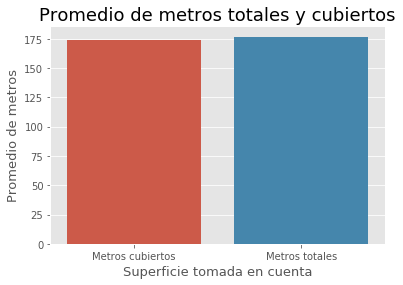

In [8]:
d = {'tipo': ['Metros cubiertos','Metros totales'], 'promedio': [data.metroscubiertos.mean(),data.metrostotales.mean()]}
mts = pd.DataFrame(data=d)
g = sns.barplot(x = "tipo", y = "promedio", data = mts)
g.set_title("Promedio de metros totales y cubiertos", fontsize=18)
g.set_xlabel("Superficie tomada en cuenta", fontsize=13)
g.set_ylabel("Promedio de metros",fontsize=13 )

Text(0, 0.5, 'Precio promedio (en miles de pesos mexicanos)')

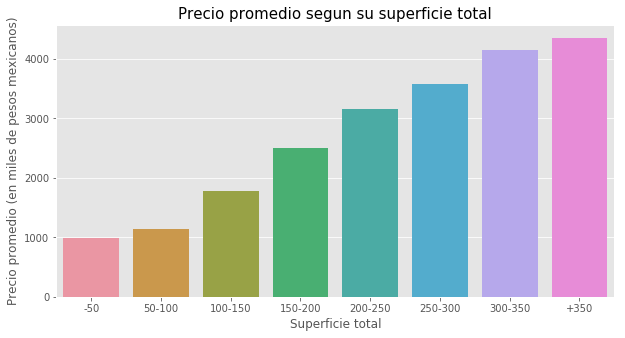

In [9]:
precio_sup = data.groupby('rango_superficie').agg({'precio':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
precio_sup = precio_sup.reindex(new_idx)
precio_sup.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = precio_sup['rango_superficie'], y= precio_sup['precio']/1000) 
g.set_title("Precio promedio segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Precio promedio (en miles de pesos mexicanos)", fontsize=12)

In [10]:
rgsup_vs_rgprecio = data.groupby(['rango_superficie','rango_precio']).agg({'sum':'sum'})
new_idx_prec = ['-1000','1000-2000','2000-3000','3000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','9000-10000','+10000']
new_idx_sup = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
rgsup_vs_rgprecio = rgsup_vs_rgprecio.reindex(new_idx_prec,level=1)
rgsup_vs_rgprecio = rgsup_vs_rgprecio.unstack()
rgsup_vs_rgprecio = rgsup_vs_rgprecio.reindex(new_idx_sup)
rgsup_vs_rgprecio = rgsup_vs_rgprecio
rgsup_vs_rgprecio = rgsup_vs_rgprecio.applymap(lambda x: np.log(x))
rgsup_vs_rgprecio.columns = rgsup_vs_rgprecio.columns.droplevel()

In [11]:
rgsup_vs_rgprecio.head()

rango_precio,-1000,1000-2000,2000-3000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000-10000,+10000
rango_superficie,,,,,,,,,,
-50,7.699389,6.232448,4.564348,2.944439,2.564949,2.302585,2.484907,1.609438,2.079442,1.945910
50-100,10.188629,9.272470,8.080237,6.122493,5.159055,4.304065,3.828641,3.044522,2.995732,1.945910
100-150,9.565915,9.816894,8.871505,7.259116,6.638568,5.866468,5.187386,4.418841,3.931826,4.143135
150-200,8.674368,9.377717,9.112397,7.690743,7.014814,6.570883,6.070738,5.525453,4.682131,5.420535
200-250,7.615791,8.494539,8.556798,7.556951,7.090910,6.714171,6.025866,5.686975,5.257495,5.389072


Text(69.0, 0.5, 'Rango de superficie')

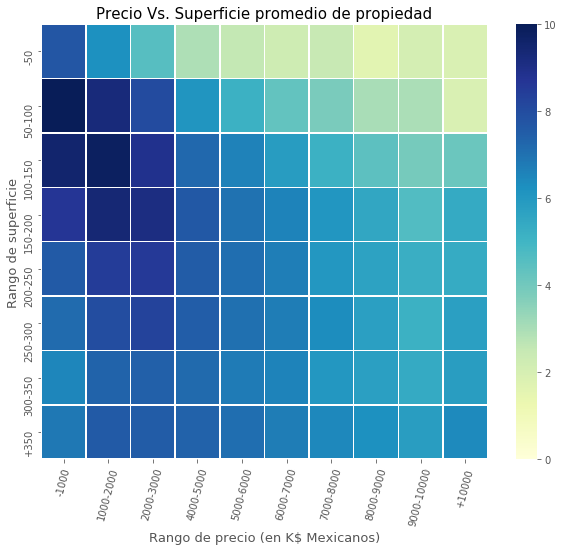

In [12]:
plt.figure(figsize=(10,8))
g = sns.heatmap(rgsup_vs_rgprecio, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Precio Vs. Superficie promedio de propiedad", fontsize=15)
g.set_xlabel("Rango de precio (en K$ Mexicanos)", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [59]:
ciudades = (data.ciudad.value_counts()>2500)
ciudades = (ciudades[ciudades==True]).index

data_ciudad = data.loc[data.ciudad.isin(ciudades)]
sup_vs_ciudad = data_ciudad.groupby(['rango_superficie','ciudad']).agg({'sum':'sum'})
new_idx_sup = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup_vs_ciudad = sup_vs_ciudad.reindex(ciudades,level=1)
sup_vs_ciudad = sup_vs_ciudad.reindex(new_idx_sup,level=0).unstack()
sup_vs_ciudad.head()

sum                                               \
ciudad           Querétaro Benito Juárez Zapopan San Luis Potosí Mérida   
rango_superficie                                                          
-50                     90           125      94              31     51   
50-100                1187          2728    2679            1232    146   
100-150               2749          1685    2268            1558    221   
150-200               2388           898    1375            1530   1310   
200-250               1296           551     966             720    973   

                                                                          \
ciudad           Monterrey Alvaro Obregón Cuauhtémoc Naucalpan de Juárez   
rango_superficie                                                           
-50                     38             67        233                  14   
50-100                 477            945       1628                 297   
100-150               1375            803        915                 828   
150-200               1430            730        530                1467   
200-250                800            520        275                1041   

                                 ...                                           \
ciudad           Miguel Hidalgo  ... Cuernavaca Chihuahua Tlalnepantla de Baz   
rango_superficie                 ...                                            
-50                          82  ...         22        19                  21   
50-100                     1070  ...        294        99                 557   
100-150                     644  ...        298       739                 813   
150-200                     590  ...        407       795                 846   
200-250                     299  ...        388       443                 332   

                                                                            \
ciudad           Cuautitlán Izcalli Tlajomulco de Zúñiga Gustavo A. Madero   
rango_superficie                                                             
-50                              74                   19                70   
50-100                         1326                  761               560   
100-150                         760                  804               489   
150-200                         353                  484               593   
200-250                         132                  323               230   

                                                                      
ciudad           Iztapalapa Cuajimalpa de Morelos Tijuana Hermosillo  
rango_superficie                                                      
-50                     152                    24      14          5  
50-100                  704                   359    1095         51  
100-150                 465                   286     978        887  
150-200                 344                   320     398        584  
200-250                 177                   217     102        346  

[5 rows x 28 columns]

In [60]:
sup_vs_ciudad = sup_vs_ciudad.applymap(lambda x: np.log(x))
sup_vs_ciudad.columns = sup_vs_ciudad.columns.droplevel()

Text(114.0, 0.5, 'Rango de superficie')

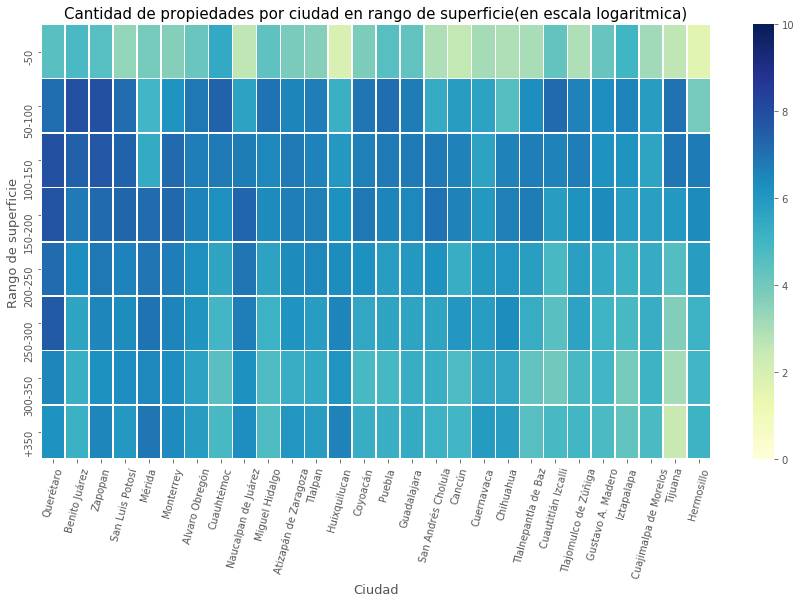

In [63]:
plt.figure(figsize=(15,8))
g = sns.heatmap(sup_vs_ciudad, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Cantidad de propiedades por ciudad en rango de superficie(en escala logaritmica)", fontsize=15)
g.set_xlabel("Ciudad", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)
#FALTA ORDENAR EL INDICE VERTICAL

Text(0, 0.5, 'Cantidad de propiedades publicadas')

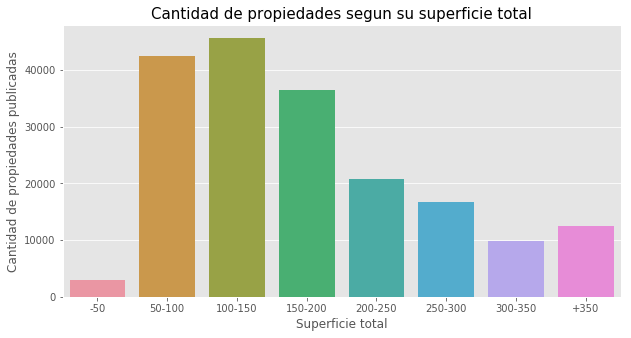

In [16]:
sup = data.groupby('rango_superficie').agg({'sum':'sum'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup = sup.reindex(new_idx)
sup.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = sup['rango_superficie'], y= sup['sum']) 
g.set_title("Cantidad de propiedades segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=12)

In [22]:
data_habitaciones = data.dropna(subset=['habitaciones','garages','banos'])
data_habitaciones = data_habitaciones[['rango_superficie','habitaciones','garages','banos']]
data_habitaciones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180644 entries, 0 to 239999
Data columns (total 4 columns):
rango_superficie    142810 non-null object
habitaciones        180644 non-null float32
garages             180644 non-null float32
banos               180644 non-null float64
dtypes: float32(2), float64(1), object(1)
memory usage: 5.5+ MB


In [23]:
data_habitaciones = data_habitaciones.groupby('rango_superficie').agg({'habitaciones':'mean','garages':'mean','banos':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
#data_habitaciones = data_habitaciones.reindex(new_idx).transpose()
data_habitaciones

,habitaciones,garages,banos
rango_superficie,,,
+350,3.276743,2.121395,2.901059
-50,2.066761,0.859426,1.198872
100-150,2.919479,1.654476,1.989900
150-200,3.095631,1.871129,2.352092
200-250,3.185427,2.008065,2.602777
250-300,3.216486,2.111585,2.810926
300-350,3.241151,2.152664,2.879813
50-100,2.430441,1.217991,1.449118


Text(0, 0.5, 'Cantidad de habitaciones')

<Figure size 1440x576 with 0 Axes>

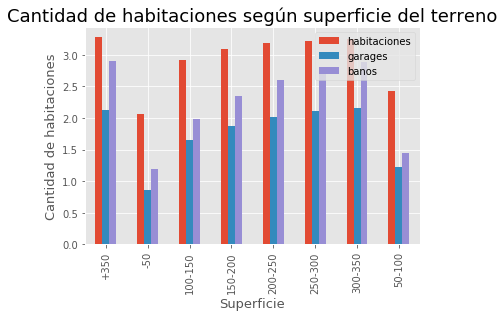

In [24]:
plt.figure(figsize=(20,8))

x = data_habitaciones.plot(kind='bar')
x.set_title("Cantidad de habitaciones según superficie del terreno", fontsize=18)
x.set_xlabel("Superficie", fontsize=13)
x.set_ylabel("Cantidad de habitaciones", fontsize=13)

Text(0, 0.5, 'Promedio de habitaciones')

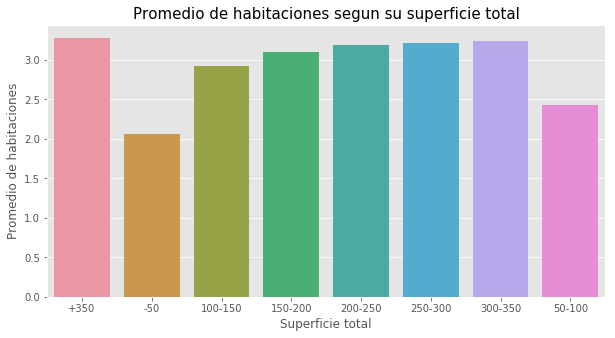

In [31]:
habit = data_habitaciones['habitaciones'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = habit['rango_superficie'], y= habit['habitaciones']) 
g.set_title("Promedio de habitaciones segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de habitaciones", fontsize=12)

Text(0, 0.5, 'Promedio de baños')

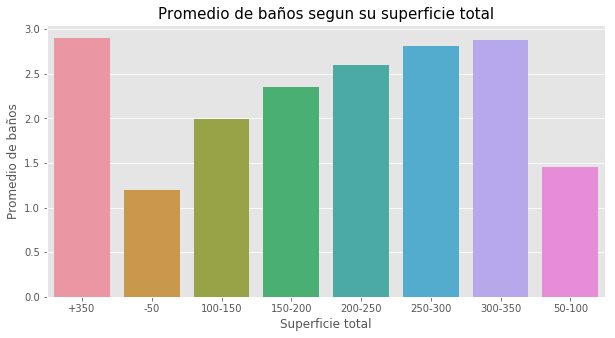

In [32]:
banos = data_habitaciones['banos'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = banos['rango_superficie'], y= banos['banos']) 
g.set_title("Promedio de baños segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de baños", fontsize=12)

Text(0, 0.5, 'Promedio de garages')

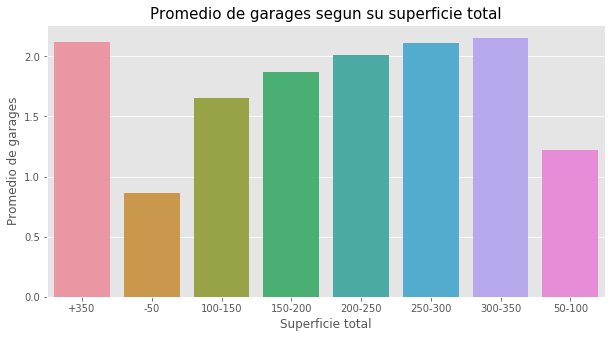

In [33]:
garages = data_habitaciones['garages'].reset_index()
plt.figure(figsize = (10,5))
g = sns.barplot(x = garages['rango_superficie'], y= garages['garages']) 
g.set_title("Promedio de garages segun su superficie total", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Promedio de garages", fontsize=12)

Text(69.0, 0.5, 'Rango de superficie')

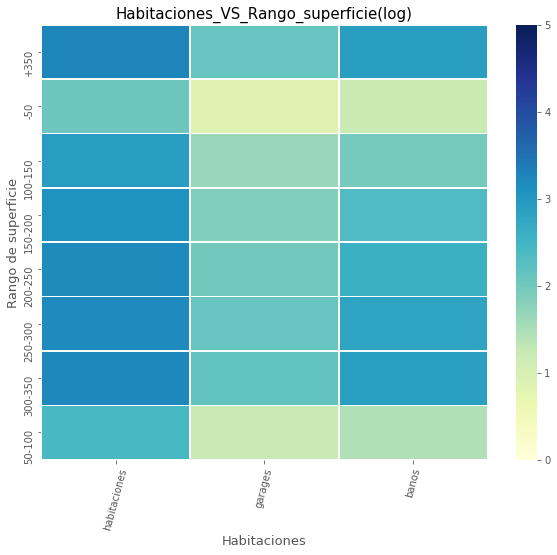

In [34]:
plt.figure(figsize=(10,8))
g = sns.heatmap(data_habitaciones, vmin = 0, vmax=5, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Habitaciones_VS_Rango_superficie(log)", fontsize=15)
g.set_xlabel("Habitaciones", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [35]:
mex_df = data[data['provincia'].isin(['Distrito Federal'])]
mex_df.metrostotales.sum()

6160053.0

Text(0, 0.5, 'Cantidad de propiedades publicadas')

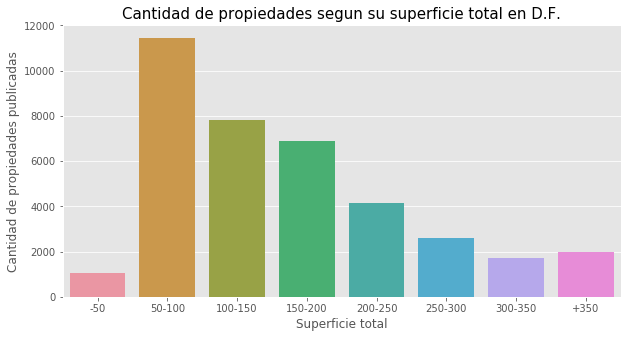

In [36]:
sup_df = mex_df.groupby('rango_superficie').agg({'sum':'sum'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup_df = sup_df.reindex(new_idx)
sup_df.reset_index(inplace=True)
plt.figure(figsize = (10,5))
g = sns.barplot(x = sup_df['rango_superficie'], y= sup_df['sum']) 
g.set_title("Cantidad de propiedades segun su superficie total en D.F.", fontsize=15)
g.set_xlabel("Superficie total", fontsize=12)
g.set_ylabel("Cantidad de propiedades publicadas", fontsize=12)


In [50]:
sup_vs_precio = mex_df.groupby(['rango_superficie','rango_precio']).agg({'sum':'sum'})
new_idx_df = ['-1000','1000-2000','2000-3000','3000','4000-5000','5000-6000','6000-7000','7000-8000','8000-9000','9000-10000','+10000']
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
sup_vs_precio = sup_vs_precio.reindex(new_idx_df,level=1)
sup_vs_precio = sup_vs_precio.unstack()
sup_vs_precio = sup_vs_precio.reindex(new_idx)
sup_vs_precio = sup_vs_precio.applymap(lambda x: np.log(x))
sup_vs_precio.columns = sup_vs_precio.columns.droplevel()
sup_vs_precio

rango_precio,-1000,1000-2000,2000-3000,4000-5000,5000-6000,6000-7000,7000-8000,8000-9000,9000-10000,+10000
rango_superficie,,,,,,,,,,
-50,6.542472,5.662960,3.806662,1.609438,1.609438,1.386294,1.791759,0.000000,0.000000,0.000000
50-100,7.877018,8.434681,7.797291,5.971262,5.003946,4.234107,3.688879,2.944439,2.772589,1.791759
100-150,5.509388,7.345365,7.595387,6.949856,6.459904,5.765191,5.117994,4.330733,3.761200,4.007333
150-200,4.948760,6.782192,7.216709,6.927558,6.498282,6.165418,5.805135,5.347108,4.543295,5.332719
200-250,4.174387,5.846439,6.576470,6.453625,6.135565,6.040255,5.497168,5.176150,4.941642,5.105945
250-300,3.663562,5.105945,6.045005,5.880533,5.723585,5.560682,5.393628,4.927254,4.499810,5.176150
300-350,3.135494,4.477337,5.093750,5.552960,5.332719,5.192957,5.030438,4.927254,4.605170,5.220356
+350,3.295837,4.330733,5.105945,5.549076,5.411646,5.262690,5.231109,5.204007,4.812184,5.703782


Text(69.0, 0.5, 'Rango de superficie')

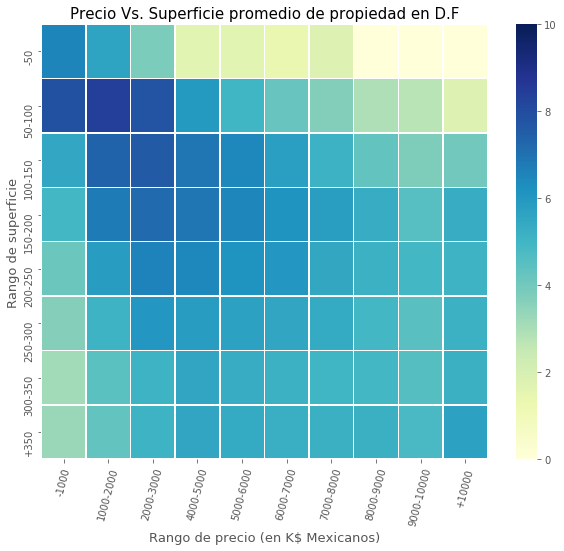

In [52]:
plt.figure(figsize=(10,8))
g = sns.heatmap(sup_vs_precio, vmin = 0, vmax=10, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Precio Vs. Superficie promedio de propiedad en D.F", fontsize=15)
g.set_xlabel("Rango de precio (en K$ Mexicanos)", fontsize=13)
g.set_ylabel("Rango de superficie", fontsize=13)

In [27]:
data_habitaciones = mex_df.groupby('rango_superficie').agg({'habitaciones':'mean','garages':'mean','banos':'mean'})
new_idx = ['-50','50-100','100-150','150-200','200-250','250-300','300-350','+350']
data_habitaciones = data_habitaciones.reindex(new_idx)
data_habitaciones

,habitaciones,garages,banos
rango_superficie,,,
-50,1.922747,0.612308,1.152577
50-100,2.296390,1.107751,1.491861
100-150,2.913364,1.621415,2.131348
150-200,3.283031,1.801707,2.409203
200-250,3.445411,1.838253,2.569650
250-300,3.495794,1.797332,2.719096
300-350,3.590389,1.629948,2.791367
+350,3.635246,1.526618,2.871016


Text(0, 0.5, 'Cantidad de habitaciones')

<Figure size 720x360 with 0 Axes>

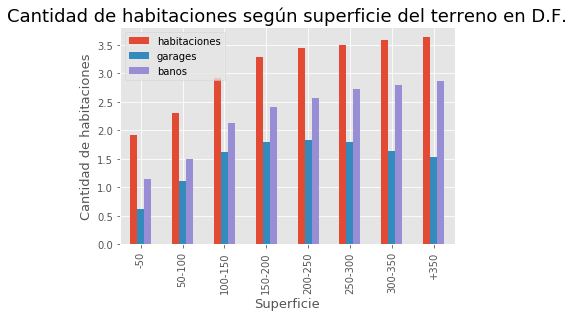

In [28]:
plt.figure(figsize = (10,5))
x = data_habitaciones.plot(kind='bar')
x.set_title("Cantidad de habitaciones según superficie del terreno en D.F.", fontsize=18)
x.set_xlabel("Superficie", fontsize=13)
x.set_ylabel("Cantidad de habitaciones", fontsize=13)

In [42]:
data.metrostotales.mean()

176.76514456355122

In [41]:
data.metroscubiertos.mean()

174.01677448337827

In [40]:
data.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,precio,sum
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,211379.00,116512.000000,116512.000000,2.400000e+05,240000.0
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2423798.75,20.695868,-99.459984,2.530838e+06,1.0
std,86634.579744,9.556732,0.896799,0.852988,0.912546,98.152950,94.427328,10568614.00,3.137765,9.743021,2.152552e+06,0.0
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,22.00,-100.886681,-125.859375,3.100000e+05,1.0
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,24890.00,19.359844,-100.977913,9.527725e+05,1.0
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,56383.00,19.543274,-99.240387,1.850000e+06,1.0
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,87838.00,20.740005,-99.134781,3.390000e+06,1.0
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,50004000.00,83.026222,121.036003,1.252500e+07,1.0
